<a href="https://colab.research.google.com/github/momomendoza2476-max/SIMULACI-N-II/blob/main/YAAAAAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

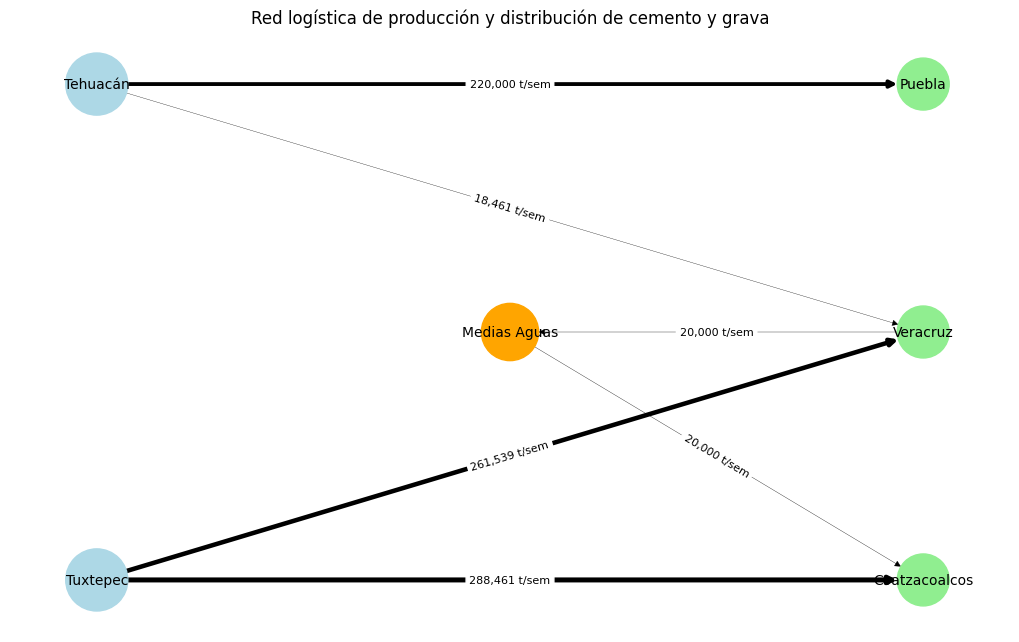

In [5]:
# ===============================================================
# GRÁFICO DE RED LOGÍSTICA (TEORÍA DE GRAFOS)
# ===============================================================

import networkx as nx
import matplotlib.pyplot as plt

# ---------------------------------------------------------------
# 1. Crear grafo dirigido
# ---------------------------------------------------------------
G = nx.DiGraph()

# ---------------------------------------------------------------
# 2. Definir nodos con tipo
# ---------------------------------------------------------------
nodos = {
    "Tuxtepec": "Productor",
    "Tehuacán": "Productor",
    "Medias Aguas": "Hub",
    "Puebla": "Distribuidor",
    "Veracruz": "Distribuidor",
    "Coatzacoalcos": "Distribuidor"
}

for nodo, tipo in nodos.items():
    G.add_node(nodo, tipo=tipo)

# ---------------------------------------------------------------
# 3. Definir rutas (aristas) con flujo semanal (ton)
# ---------------------------------------------------------------
# Estos flujos provienen del modelo de transporte que ya resolvimos

rutas = [
    ("Tuxtepec", "Coatzacoalcos", 288_461),
    ("Tuxtepec", "Veracruz", 261_539),
    ("Tehuacán", "Puebla", 220_000),
    ("Tehuacán", "Veracruz", 18_461),
    ("Veracruz", "Medias Aguas", 20_000),
    ("Medias Aguas", "Coatzacoalcos", 20_000)
]

for origen, destino, flujo in rutas:
    G.add_edge(origen, destino, flujo=flujo)

# ---------------------------------------------------------------
# 4. Posiciones manuales (para que se vea CLARO)
# ---------------------------------------------------------------
pos = {
    "Tuxtepec": (0, 0),
    "Tehuacán": (0, 2),
    "Medias Aguas": (2, 1),
    "Puebla": (4, 2),
    "Veracruz": (4, 1),
    "Coatzacoalcos": (4, 0)
}

# ---------------------------------------------------------------
# 5. Tamaños de nodos según tipo
# ---------------------------------------------------------------
node_sizes = []
node_colors = []

for nodo in G.nodes():
    if nodos[nodo] == "Productor":
        node_sizes.append(2000)
        node_colors.append("lightblue")
    elif nodos[nodo] == "Hub":
        node_sizes.append(1700)
        node_colors.append("orange")
    else:
        node_sizes.append(1400)
        node_colors.append("lightgreen")

# ---------------------------------------------------------------
# 6. Grosor de aristas proporcional al flujo
# ---------------------------------------------------------------
edge_widths = [G[u][v]['flujo'] / 80_000 for u, v in G.edges()]

# ---------------------------------------------------------------
# 7. Dibujar grafo
# ---------------------------------------------------------------
plt.figure(figsize=(10, 6))

nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=node_sizes,
    node_color=node_colors,
    width=edge_widths,
    arrows=True,
    font_size=10
)

# Etiquetas de flujo
edge_labels = {(u, v): f"{G[u][v]['flujo']:,} t/sem" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Red logística de producción y distribución de cemento y grava")
plt.axis("off")
plt.show()
